# Step wedge

## Load some modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu

import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bb

import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

import pandas as pd
import datetime 

from scipy.optimize import curve_fit

In [2]:
dc = rd.readImages('data/02_rawdata//01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
#dc.shape

In [4]:
# plt.imshow(dc,vmin=250,vmax=350)
# plt.colorbar()

In [5]:
ob = rd.readImages('data/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
# plt.imshow(ob)
# plt.colorbar()

In [7]:
water = rd.readImages('data/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# plt.imshow(water)
# plt.colorbar()

In [9]:
es = rd.readImages('data/02_rawdata/01_Stepwedges/container_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

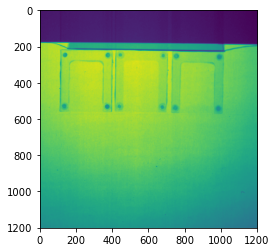

In [10]:
plt.imshow(es)

### Normalize (Beer Lambert)

$$p=-log(\frac{I-I_{dc}}{I_{ob}-I_{dc}})$$

In [11]:
# if you want to normalize with the empty wedges: uncomment the following

In [12]:
ob = es

In [13]:
ob = ob - dc
ob[ob<1]=1
ob= ob[::-1]

water = water - dc
water[water<1]=1
water = water[::-1]

Measure the intensity 'dose' in the open beam and water image. Use this as scaling in the normalization.

In [14]:
d0=ob[10:50,10:50].mean()
d=water[10:50,10:50].mean()

In [15]:
p = -np.log(d0/d*(water)/(ob))

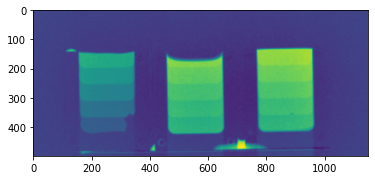

In [16]:
plt.imshow(p[500:1000,0:1150])
# plt.colorbar()

In [17]:
p=p[500:1000,0:1150]

## Look at the profile plots

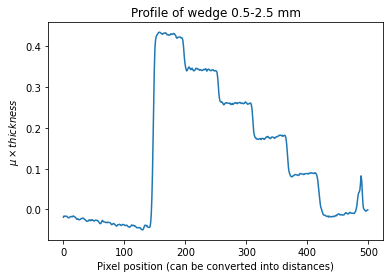

In [18]:
plt.plot(p[:,200:250].mean(axis=1))
plt.title('Profile of wedge 0.5-2.5 mm')
plt.xlabel('Pixel position (can be converted into distances)')
plt.ylabel(r'$\mu\times thickness$');

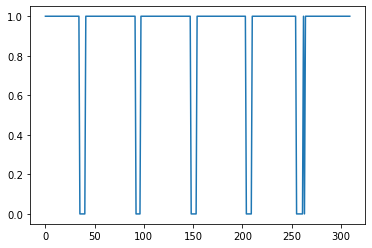

In [19]:
p1=p[:,200:250].mean(axis=1)

dp1 = p1[:-1]-p1[1:]

plt.plot(dp1[160:470]<0.005)

mask =dp1<0.005

In [20]:
from skimage.measure import label

l=label(mask)

p10=p1[1:]
np.mean(p10[l==0])

0.1751836759276611

### Task
To measure the attenuation coefficien from the images. Compare when container images are used as OB images instead of the one without anything.

In [21]:
step_wedge_1 = p[:, 200:250]
stw1_average = step_wedge_1.mean(axis=1)

step_wedge_2 = p[:, 500:550]
stw2_average = step_wedge_2.mean(axis=1)

step_wedge_3 = p[:, 800:850]
stw3_average = step_wedge_3.mean(axis=1)

d1 = (stw1_average[:-1] - stw1_average[1:])
d2 = (stw2_average[:-1] - stw2_average[1:])
d3 = (stw3_average[:-1] - stw3_average[1:])

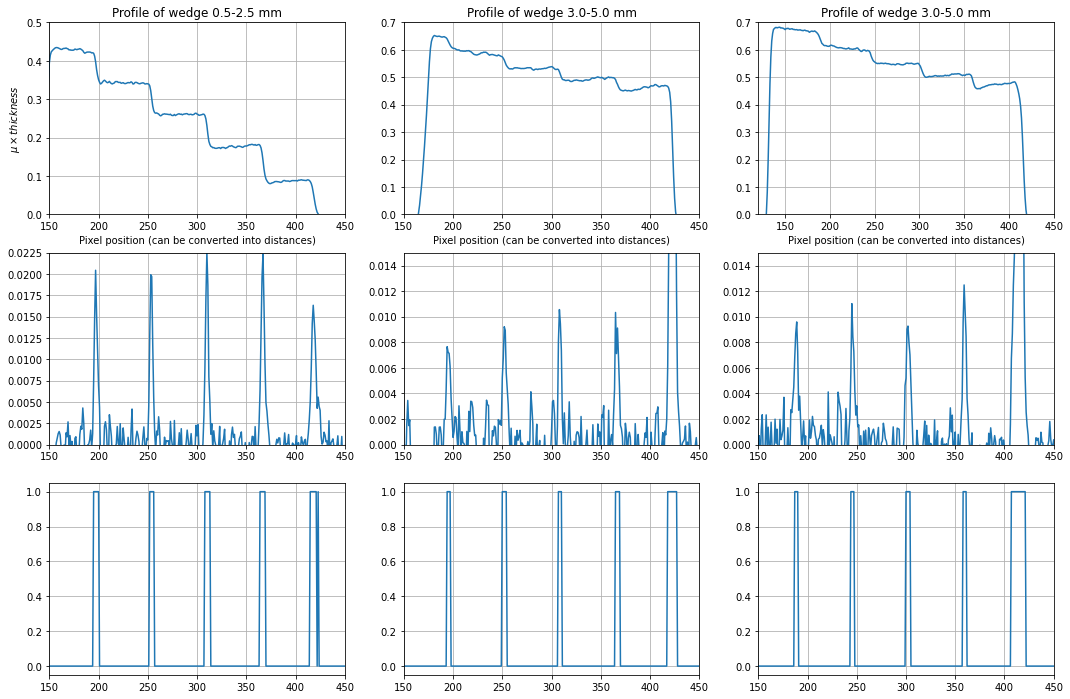

In [22]:
fig, ax = plt.subplots(3, 3)
# fig.set_size_inches(18, 10)
fig.set_size_inches(18, 12)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(step_wedge_1.mean(axis=1))
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position (can be converted into distances)')
ax[0].set_xlim(150, 450)
ax[0].set_ylim(0, 0.5)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(step_wedge_2.mean(axis=1))
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlabel('Pixel position (can be converted into distances)')
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0, 0.7)
ax[1].grid()

ax[2].plot(step_wedge_3.mean(axis=1))
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlabel('Pixel position (can be converted into distances)')
ax[2].set_xlim(120, 450)
ax[2].set_ylim(0, 0.7)
ax[2].grid()

ax[3].plot(d1)
ax[3].set_xlim(150, 450)
ax[3].set_ylim(0, 0.0225)
ax[3].grid()

ax[4].plot(d2)
ax[4].set_xlim(150, 450)
ax[4].set_ylim(0, 0.015)
ax[4].grid()

ax[5].plot(d3)
ax[5].set_xlim(150, 450)
ax[5].set_ylim(0, 0.015)
ax[5].grid()

mask1 = d1>0.0050
mask2 = d2>0.0045
mask3 = d3>0.0050

ax[6].plot(abs(d1)<mask1)
ax[6].set_xlim(150, 450)
ax[6].grid()


ax[7].plot(abs(d2)<mask2)
ax[7].set_xlim(150, 450)
ax[7].grid()

ax[8].plot(abs(d3)<mask3)
ax[8].set_xlim(150, 450)
ax[8].grid()

In [18]:
l1 = label(mask1)
l2 = label(mask2)
l3 = label(mask3)

s_stw1 = step_wedge_1.mean(axis=1)[1:]
masked_1 = s_stw1[l1 == 0]

s_stw2 = step_wedge_2.mean(axis=1)[1:]
masked_2 = s_stw2[l2 == 0]

s_stw3 = step_wedge_3.mean(axis=1)[1:]
masked_3 = s_stw3[l3 == 0]

NameError: name 'label' is not defined

NameError: name 's_stw1' is not defined

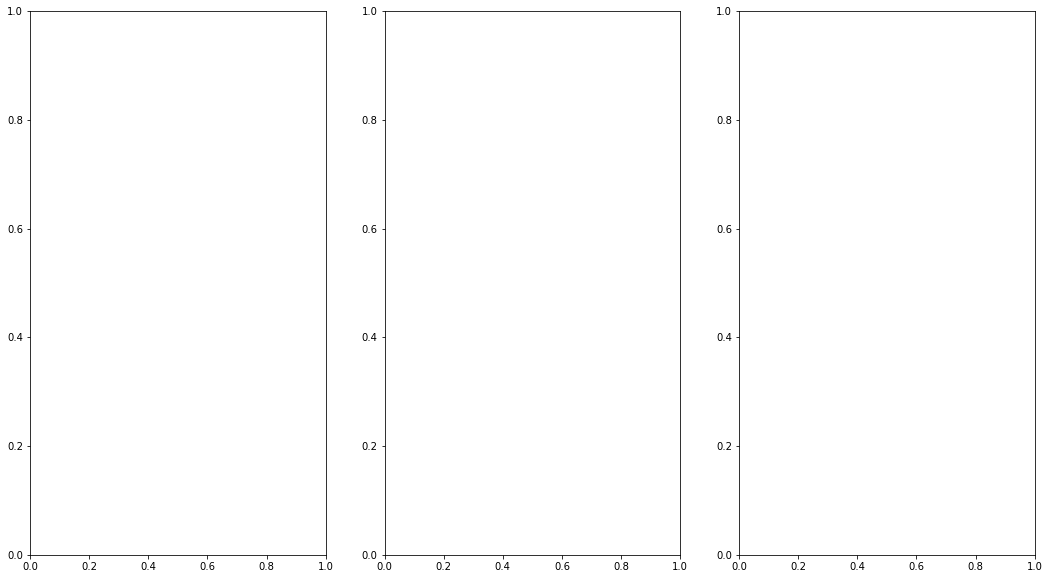

In [19]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 10)
# fig.set_size_inches(10, 5)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(s_stw1)
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position (can be converted into distances)')
ax[0].plot(np.where(l1 == 0)[0], masked_1, 'r.')
ax[0].set_xlim(125, 475)
ax[0].set_ylim(0.05, 0.45)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(s_stw2)
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlabel('Pixel position (can be converted into distances)')
ax[1].plot(np.where(l2 == 0)[0], masked_2, 'r.')
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0.45, 0.7)
ax[1].grid()

ax[2].plot(step_wedge_3.mean(axis=1))
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlabel('Pixel position (can be converted into distances)')
ax[2].plot(np.where(l3 == 0)[0], masked_3, 'r.')
ax[2].set_xlim(120, 450)
ax[2].set_ylim(0.45,0.7)
ax[2].grid()

# for i in range(3):
#     a, b = fitting_params2[i, :]
#     print(a, b)
#     model = lambda x: a * x + b
#     new_linsp = np.linspace(650, 950, 400)
#     ax[i].plot(new_linsp, model(new_linsp), color="green")
# fig.savefig("processed_data/finding_all_flat_points.png", dpi=800)

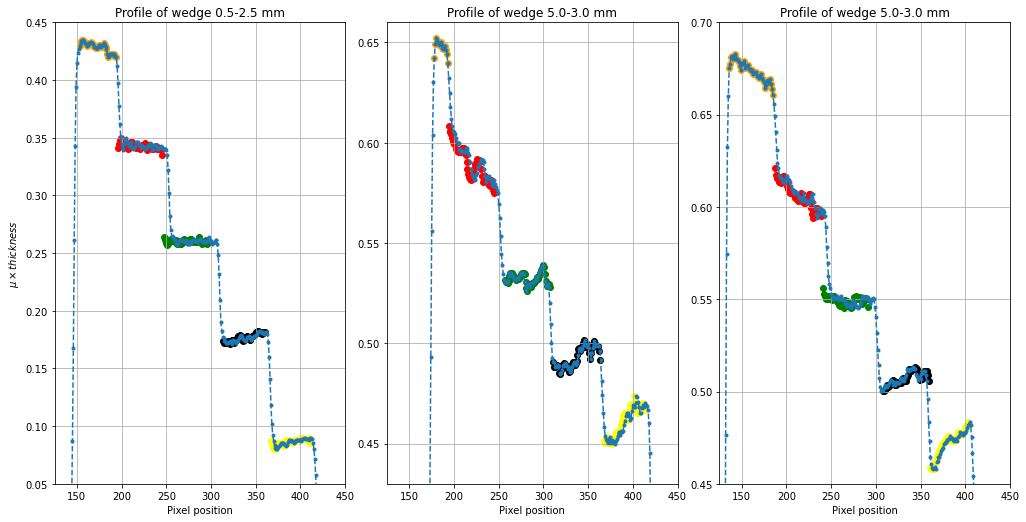

In [51]:
# when normalizing with the es
points_of_interest1_25 = range(153,195)
points_of_interest1_20 = range(196, 246)
points_of_interest1_15 = range(247, 297)
points_of_interest1_10 = range(298, 346)
points_of_interest1_5 = range(347, 397)

points_of_interest2_50 = range(178, 194)
points_of_interest2_45 = range(194, 246)
points_of_interest2_40 = range(247, 298)
points_of_interest2_35 = range(299, 352)
points_of_interest2_30 = range(353, 427)


points_of_interest3_50 = range(136, 186)
points_of_interest3_45 = range(187, 240)
points_of_interest3_40 = range(241, 292)
points_of_interest3_35 = range(293, 345)
points_of_interest3_30 = range(346, 394)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 7)
fig.tight_layout()
# fig.set_size_inches(10, 5)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(s_stw1, '.--')
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position')
ax[0].scatter(points_of_interest1_25, masked_1[points_of_interest1_25], color = "orange")
ax[0].scatter(points_of_interest1_20, masked_1[points_of_interest1_20], color = "red")
ax[0].scatter(points_of_interest1_15, masked_1[points_of_interest1_15], color = "green")
ax[0].scatter(np.array(points_of_interest1_10) + 15, masked_1[points_of_interest1_10], color = "black")
ax[0].scatter(np.array(points_of_interest1_5) + 20, masked_1[points_of_interest1_5], color = "yellow")
ax[0].set_xlim(125, 450)
ax[0].set_ylim(0.05, 0.45)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(s_stw2, '.--')
ax[1].set_title('Profile of wedge 5.0-3.0 mm')
ax[1].set_xlabel('Pixel position')
ax[1].scatter(np.array(points_of_interest2_50), masked_2[points_of_interest2_50], color = "orange")
ax[1].scatter(np.array(points_of_interest2_45), masked_2[points_of_interest2_45], color = "red")
ax[1].scatter(np.array(points_of_interest2_40) + 10, masked_2[points_of_interest2_40], color = "green")
ax[1].scatter(np.array(points_of_interest2_35) + 12, masked_2[points_of_interest2_35], color = "black")
ax[1].scatter(np.array(points_of_interest2_30) + 15, masked_2[points_of_interest2_30], color = "yellow")
ax[1].set_xlim(125, 450)
ax[1].set_ylim(0.43, 0.66)
# ax[1].set_ylabel(r'$\mu\times thickness$')
ax[1].grid()


ax[2].plot(s_stw3, '.--')
ax[2].set_title('Profile of wedge 5.0-3.0 mm')
ax[2].set_xlabel('Pixel position')
ax[2].scatter(np.array(points_of_interest3_50), masked_3[points_of_interest3_50], color = "orange")
ax[2].scatter(np.array(points_of_interest3_45), masked_3[points_of_interest3_45], color = "red")
ax[2].scatter(np.array(points_of_interest3_40), masked_3[points_of_interest3_40], color = "green")
ax[2].scatter(np.array(points_of_interest3_35)+15, masked_3[points_of_interest3_35], color = "black")
ax[2].scatter(np.array(points_of_interest3_30)+15, masked_3[points_of_interest3_30], color = "yellow")
ax[2].set_xlim(125, 450)
ax[2].set_ylim(0.45, 0.7)
ax[2].grid()

# fig.savefig("processed_data/explicit_points_es.png", dpi=800)

In [26]:
# when normalizing with ob
# points_of_interest1_25 = range(150,195)
# points_of_interest1_20 = range(196,246)
# points_of_interest1_15 = range(247,297)
# points_of_interest1_10 = range(298,347)
# points_of_interest1_5 = range(348,397)

# points_of_interest2_50 = range(178,194)
# points_of_interest2_45 = range(194,247)
# points_of_interest2_40 = range(248,299)
# points_of_interest2_35 = range(300,353)
# points_of_interest2_30 = range(354,427)


# points_of_interest3_50 = range(136,186)
# points_of_interest3_45 = range(187,240)
# points_of_interest3_40 = range(241,293)
# points_of_interest3_35 = range(294,345)
# points_of_interest3_30 = range(346,394)

# fig, ax = plt.subplots(1, 3)
# fig.set_size_inches(14, 7)
# fig.tight_layout()
# # fig.set_size_inches(10, 5)
# # fig.set_dpi(800)
# ax = ax.ravel()

# ax[0].plot(s_stw1, '.--')
# ax[0].set_title('Profile of wedge 0.5-2.5 mm')
# ax[0].set_xlabel('Pixel position')
# ax[0].scatter(points_of_interest1_25, masked_1[points_of_interest1_25], color = "orange")
# ax[0].scatter(points_of_interest1_20, masked_1[points_of_interest1_20], color = "red")
# ax[0].scatter(points_of_interest1_15, masked_1[points_of_interest1_15], color = "green")
# ax[0].scatter(points_of_interest1_10, masked_1[points_of_interest1_10], color = "black")
# ax[0].scatter(points_of_interest1_5, masked_1[points_of_interest1_5], color = "yellow")
# ax[0].set_xlim(125, 450)
# ax[0].set_ylim(0.05, 0.45)
# ax[0].set_ylabel(r'$\mu\times thickness$')
# ax[0].grid()

# ax[1].plot(s_stw2, '.--')
# ax[1].set_title('Profile of wedge 5.0-3.0 mm')
# ax[1].set_xlabel('Pixel position')
# ax[1].scatter(points_of_interest2_50, masked_2[points_of_interest2_50], color = "orange")
# ax[1].scatter(points_of_interest2_45, masked_2[points_of_interest2_45], color = "red")
# ax[1].scatter(points_of_interest2_40, masked_2[points_of_interest2_40], color = "green")
# ax[1].scatter(points_of_interest2_35, masked_2[points_of_interest2_35], color = "black")
# ax[1].scatter(points_of_interest2_30, masked_2[points_of_interest2_30], color = "yellow")
# ax[1].set_xlim(125, 450)
# ax[1].set_ylim(0.45, 0.66)
# # ax[1].set_ylabel(r'$\mu\times thickness$')
# ax[1].grid()


# ax[2].plot(s_stw3, '.--')
# ax[2].set_title('Profile of wedge 5.0-3.0 mm')
# ax[2].set_xlabel('Pixel position')
# ax[2].scatter(points_of_interest3_50, masked_3[points_of_interest3_50], color = "orange")
# ax[2].scatter(points_of_interest3_45, masked_3[points_of_interest3_45], color = "red")
# ax[2].scatter(points_of_interest3_40, masked_3[points_of_interest3_40], color = "green")
# ax[2].scatter(points_of_interest3_35, masked_3[points_of_interest3_35], color = "black")
# ax[2].scatter(points_of_interest3_30, masked_3[points_of_interest3_30], color = "yellow")
# ax[2].set_xlim(125, 450)
# ax[2].set_ylim(0.45, 0.7)
# # ax[2].set_ylabel(r'$\mu\times thickness$')
# ax[2].grid()
# # fig.savefig("processed_data/finding_explicit_points1.png", dpi=800)

##### Normierung 

In [27]:
px_per_cm = 112.78 # px / cm
cm_per_pix = px_per_cm**-1

### Step wedge 1 

In [28]:
optical_depths1 = np.array([masked_1[i].mean() for i in (points_of_interest1_25, points_of_interest1_20, 
                                             points_of_interest1_15, points_of_interest1_10, 
                                             points_of_interest1_5) ]) # unitless
errors1 = np.array([masked_1[i].std(ddof=1) for i in (points_of_interest1_25, points_of_interest1_20, 
                                             points_of_interest1_15, points_of_interest1_10, 
                                             points_of_interest1_5) ]) # unitless

actual_depths1 = np.array([0.25, 0.2, 0.15, 0.1, 0.05]) # cm


###### Fit & plot

In [29]:
linear = lambda x, a, b: a*x + b
pc1, pcov1 = curve_fit(linear, actual_depths1, optical_depths1, sigma = errors1)
fit_err1 = np.sqrt(np.diag(pcov1))
newlin1 = lambda x: pc1[0] *x + pc1[1]

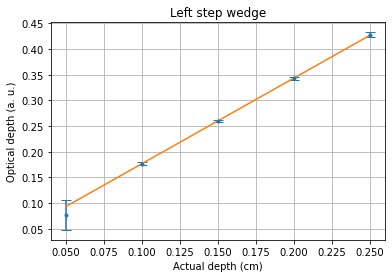

In [30]:
plt.errorbar(actual_depths1, optical_depths1, errors1, capsize=5, marker='.', linestyle='')
plt.plot(actual_depths1, newlin1(actual_depths1))
plt.title("Left step wedge")
plt.xlabel("Actual depth (cm)")
plt.ylabel("Optical depth (a. u.)")
plt.grid()

In [31]:
# pc1[0] # per cm

In [32]:
χsq =  ( (optical_depths1 - newlin1(actual_depths1) )**2 / errors1**2 ) 

In [33]:
χsq

array([0.07001873, 0.14058687, 0.02507903, 0.0013513 , 0.3084486 ])

In [34]:
sum(χsq)

0.5454845343496878

### Step Wedge 2

In [35]:
optical_depths2 = np.array([masked_2[i].mean() for i in (points_of_interest2_50, points_of_interest2_45, 
                                             points_of_interest2_40, points_of_interest2_35, 
                                             points_of_interest2_30) ]) # unitless

errors2 = np.array([masked_2[i].std(ddof=1) for i in (points_of_interest2_50, points_of_interest2_45, 
                                             points_of_interest2_40, points_of_interest2_35, 
                                             points_of_interest2_30) ]) # unitless


actual_depths2 = np.array([0.5, 0.45, 0.40, 0.35, 0.3])


In [36]:
errors2[-1] *= 0.08

In [37]:
linear = lambda x, a, b: a*x + b
pc2, pcov2 = curve_fit(linear, actual_depths2, optical_depths2)
fit_err2 = np.sqrt(np.diag(pcov2))
newlin2 = lambda x: pc2[0] *x + pc2[1]

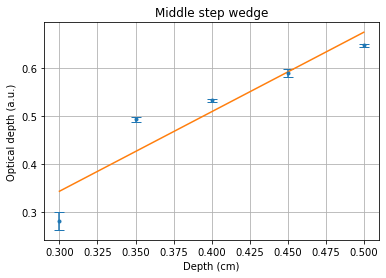

In [38]:
plt.errorbar(actual_depths2, optical_depths2, errors2, marker='.', linestyle='', capsize=5)
plt.plot(actual_depths2, newlin2(actual_depths2))
plt.xlabel("Depth (cm)")
plt.ylabel("Optical depth (a.u.)")
plt.title("Middle step wedge")
plt.grid()

In [39]:
pc2[0] # per cm

1.65735898275892

### Step Wedge 3 

In [40]:
optical_depths3 = np.array([masked_3[i].mean() for i in (points_of_interest3_50, points_of_interest3_45, 
                                             points_of_interest3_40, points_of_interest3_35, 
                                             points_of_interest3_30) ]) # unitless
errors3 = np.array([masked_3[i].std(ddof=1) for i in (points_of_interest3_50, points_of_interest3_45, 
                                             points_of_interest3_40, points_of_interest3_35, 
                                             points_of_interest3_30) ]) # unitless

actual_depths3 = np.array([0.5, 0.45, 0.40, 0.35, 0.3])

In [41]:
linear = lambda x, a, b: a*x + b
pc3, pcov3 = curve_fit(linear, actual_depths3, optical_depths3, sigma=errors3)
fit_err3 = np.sqrt(np.diag(pcov3))
newlin3 = lambda x: pc3[0] *x + pc3[1]

In [42]:
errors3[-1] *= 0.2

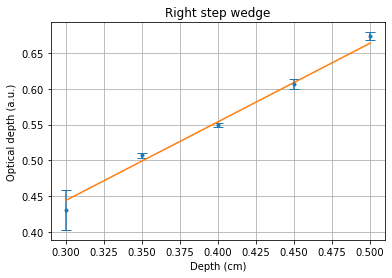

In [43]:
plt.errorbar(actual_depths3, optical_depths3, errors3, marker='.', linestyle='', capsize=5)
plt.plot(actual_depths3, newlin3(actual_depths3))
plt.xlabel("Depth (cm)")
plt.ylabel("Optical depth (a.u.)")
plt.title("Right step wedge")
plt.grid()
# plt.savefig("processed_data/step_wedge3.png")

In [44]:
pc3[0] # per cm

1.0997810144584195

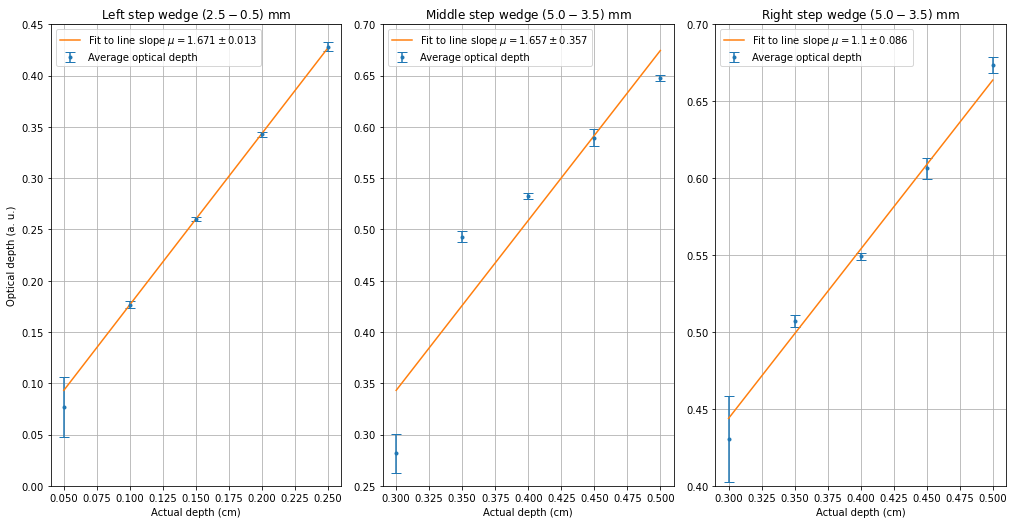

In [50]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 7)
fig.tight_layout()

ax[0].errorbar(actual_depths1, optical_depths1, errors1, capsize=5, marker='.', linestyle='', label="Average optical depth")
ax[0].plot(actual_depths1, newlin1(actual_depths1), label=f"Fit to line slope $\mu = {round(pc1[0], 3)} \pm {round(fit_err1[0], 3)}$")
ax[0].set_ylim(0.00,0.45)
ax[0].set_title("Left step wedge ($2.5-0.5$) mm")
ax[0].set_ylabel("Optical depth (a. u.)")

ax[1].errorbar(actual_depths2, optical_depths2, errors2, marker='.', linestyle='', capsize=5, label="Average optical depth")
ax[1].plot(actual_depths2, newlin2(actual_depths2), label=f"Fit to line slope $\mu = {round(pc2[0], 3)} \pm {round(fit_err2[0], 3)}$")
ax[1].set_title("Middle step wedge ($5.0-3.5$) mm")
ax[1].set_ylim(0.25,0.7)


ax[2].errorbar(actual_depths3, optical_depths3, errors3, marker='.', linestyle='', capsize=5, label="Average optical depth")
ax[2].plot(actual_depths3, newlin3(actual_depths3), label=f"Fit to line slope $\mu = {round(pc3[0], 3)} \pm {round(fit_err3[0], 3)}$")
ax[2].set_title("Right step wedge ($5.0-3.5$) mm")
ax[2].set_ylim(0.4,0.7)


for axis in ax:
    axis.grid()
    axis.set_xlabel("Actual depth (cm)")
    axis.legend(loc="upper left")

# fig.savefig("processed_data/attenuation_coeffs_es_norm.png", dpi=800)

## Black body correction
Scattered neutrons introduce a bias in the values. This can be corrected using black body images.